In [45]:
import numpy as np
import pandas as pd

from EvaluationMetrics import amex_metric_mod


In [46]:
xgb_oof = pd.read_csv('output_XGBoost_ver4.csv')
lgb_oof_2 = pd.read_csv('output_LGBoost_ver4.csv')
xgb_oof_2_2nd_half = pd.read_csv('output_XGBoost_ver42nd_half.csv')

GRU_Starter = pd.read_csv('GRUStarter.csv')


In [47]:
xgb_pred = pd.concat([xgb_oof, xgb_oof_2_2nd_half], ignore_index=True)

In [37]:
lgb_oof_2

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.035744
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.001407
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.031534
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.351197
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.846494
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.016986
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.821962
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.535229
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.323053


In [39]:
combined_df = xgb_pred

<AxesSubplot:>

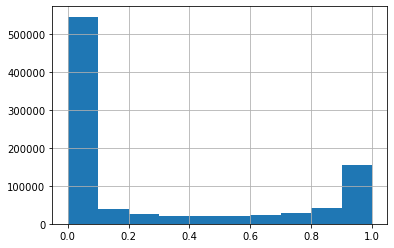

In [52]:
xgb_pred['prediction'].hist()

<AxesSubplot:>

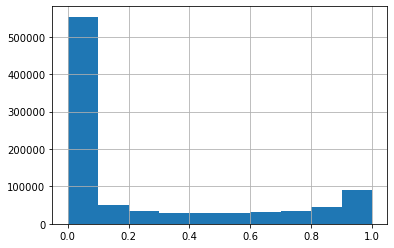

In [51]:
GRU_Starter['prediction'].hist()

In [64]:
list(lgb_oof_2.columns)

['customer_ID', 'prediction']

<AxesSubplot:>

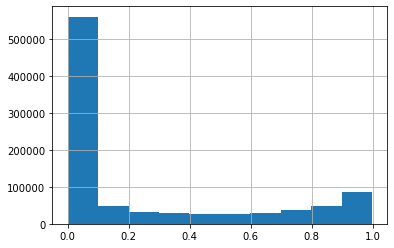

In [50]:
lgb_oof_2['prediction'].hist()

<AxesSubplot:>

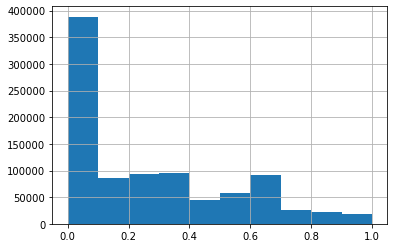

In [58]:
combined_df['prediction'].hist()

In [56]:
np.median((xgb_pred['prediction'] + lgb_oof_2['prediction']+ GRU_Starter['prediction']), axis=0)

0.5554955086165376

In [59]:
combined_df['prediction'] = (xgb_pred['prediction']*lgb_oof_2['prediction']* GRU_Starter['prediction'])^(1/3)

TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]

In [41]:
combined_df.to_csv('combined_predictionv4.csv', index=False)

In [11]:
xgb_score = amex_metric_mod(xgb_oof['target'], xgb_oof.oof_pred.values)
lgb_score = amex_metric_mod(lgb_oof['target'], lgb_oof.oof_pred.values)

In [13]:
print(f'xgb Kaggle score {xgb_score}', '\n'
     f'lgb Kaggle score {lgb_score}')

 xgb Kaggle score 0.021241572745324663 
 lgb Kaggle score 0.02087666430065401
